<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [208]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data to Pandas DataFrame

In [209]:
data = pd.read_csv('real-estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [210]:
data.shape

(414, 8)

## Droping Unnecessary Columns

In [211]:
# Dropping the 'No' column as it is just an identifier and not relevant for prediction
data = data.drop(columns=['No'])

# Converting 'X1 transaction date' to only have the year value by splitting and keeping the first part
data['X1 transaction date'] = data['X1 transaction date'].apply(lambda x: str(x).split('.')[0])

# Dropping the 'X1 transaction date' column as mutual information with house price is zero, indicating irrelevance
# Observations obtained from subsequent steps; to see this result, comment out the line below.
data = data.drop(columns=['X1 transaction date'])


## Splitting Data to Train and Test

In [212]:
# Splitting the dataset into training and testing sets
X = data.drop(columns=['Y house price of unit area'])
y = data['Y house price of unit area']

# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (331, 5) (331,)
Testing set shape: (83, 5) (83,)


## Visualizing Data Distribution and Correlation

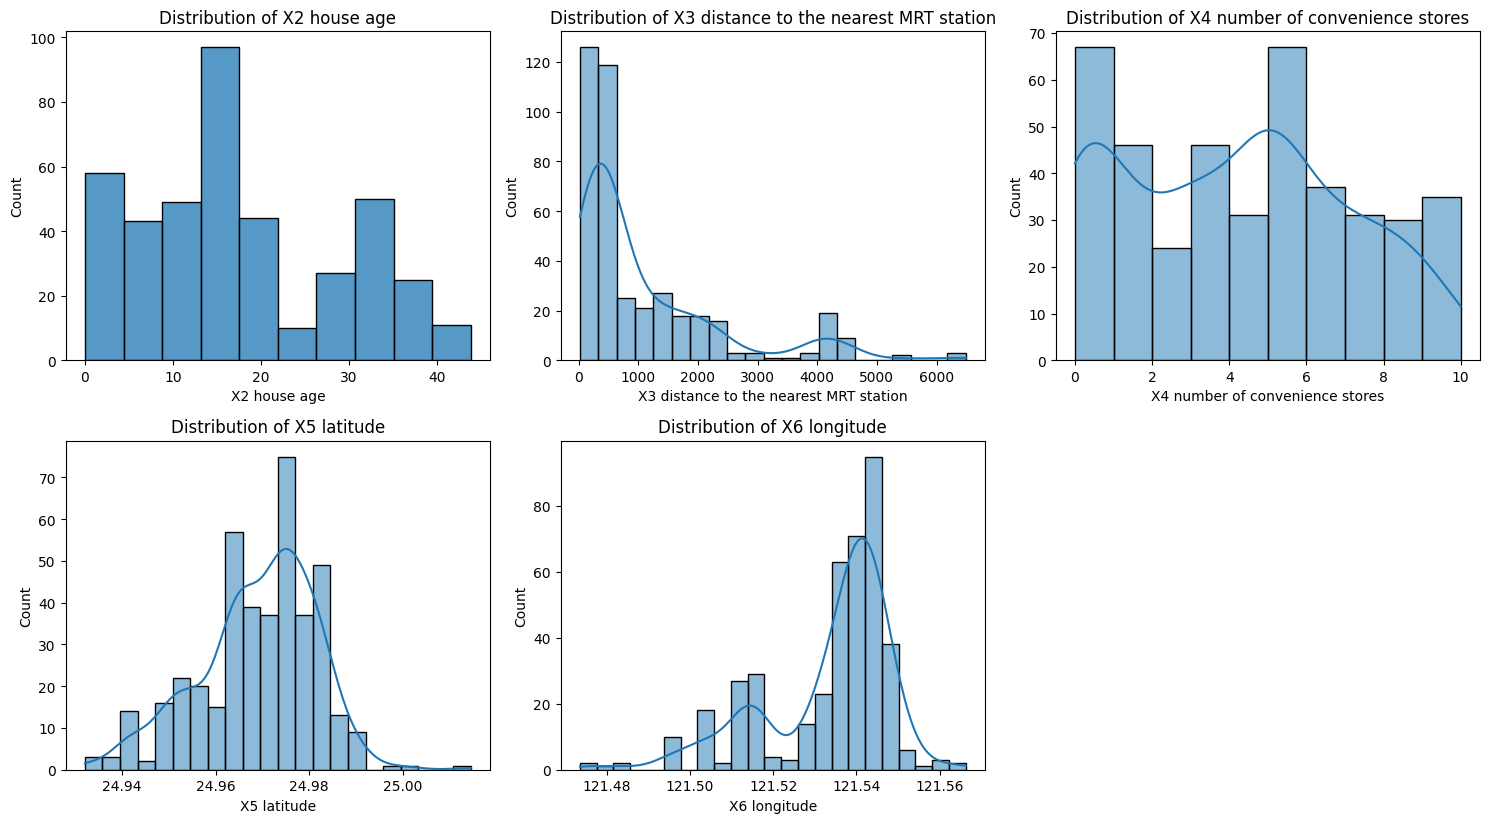

In [213]:
# Visualizing the distribution of each feature in the dataset
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a list of column headers not including the price column
features = data.columns.drop('Y house price of unit area')

# Plot each column
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid parameters based on your number of features
    if i != 0:
        sns.histplot(data[feature], kde=True)
    else:
        sns.histplot(data[feature], kde=False)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

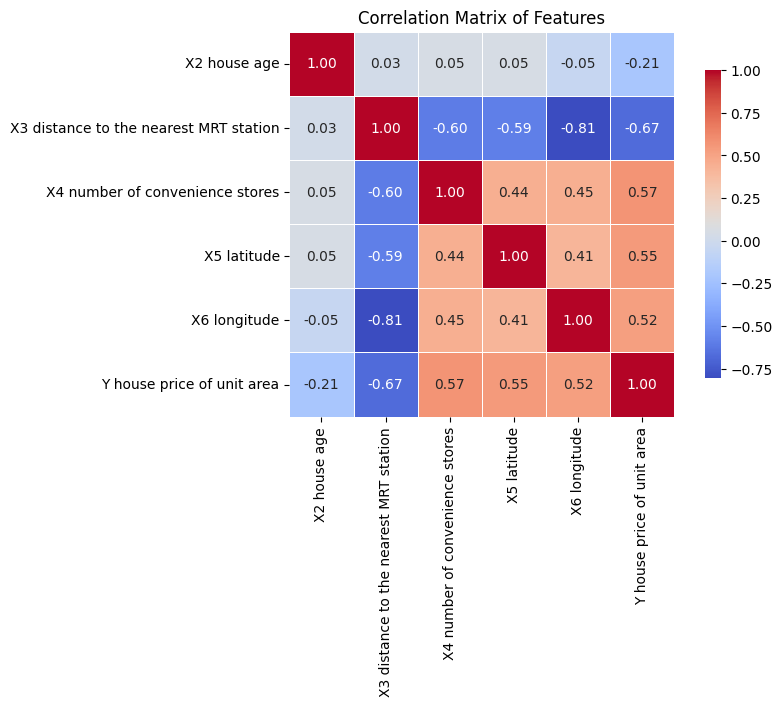

In [214]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Setting up the matplotlib figure for the heatmap
plt.figure(figsize=(8, 5))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Adding a title
plt.title('Correlation Matrix of Features')

# Showing the plot
plt.show()

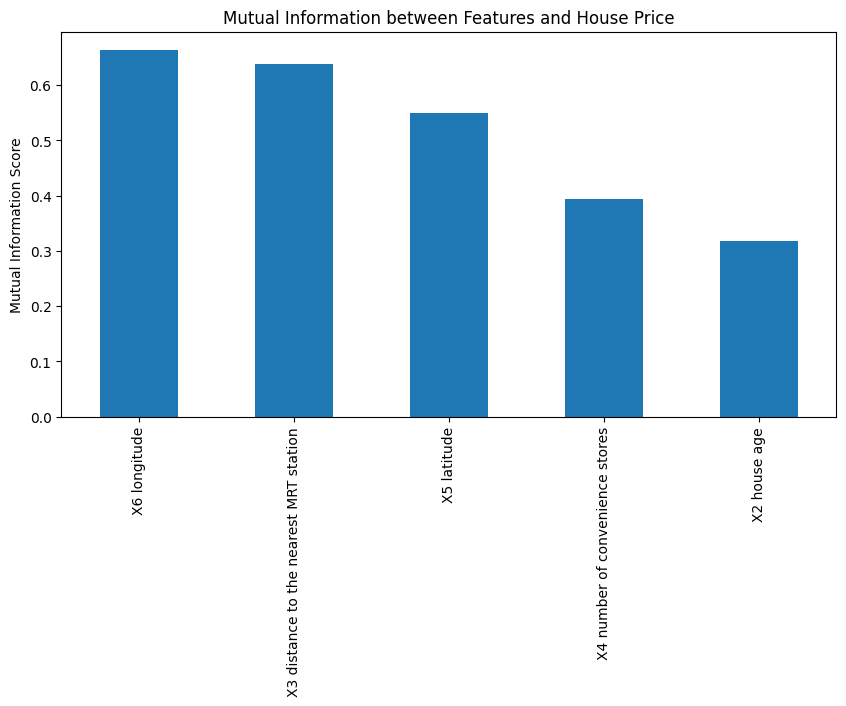

In [215]:
# Calculate the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plotting the mutual information
plt.figure(figsize=(10, 5))
mutual_info_series.sort_values(ascending=False).plot.bar()
plt.title('Mutual Information between Features and House Price')
plt.ylabel('Mutual Information Score')
plt.show()

the transaction date must be delete from columns.

## Linear Regression

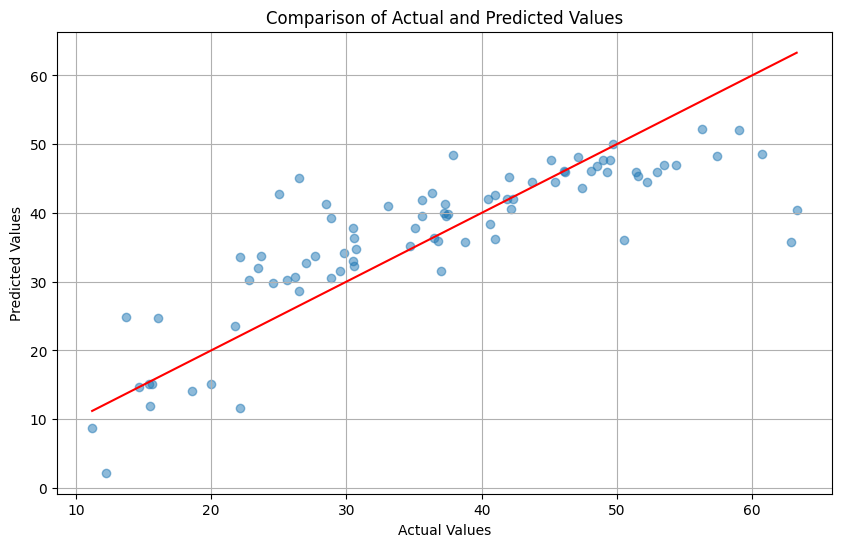

Linear Regression - Mean Squared Error: 54.58
Linear Regression - R^2 Score: 0.67


In [216]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()


print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R^2 Score: {r2:.2f}")

## Polynomial Regression

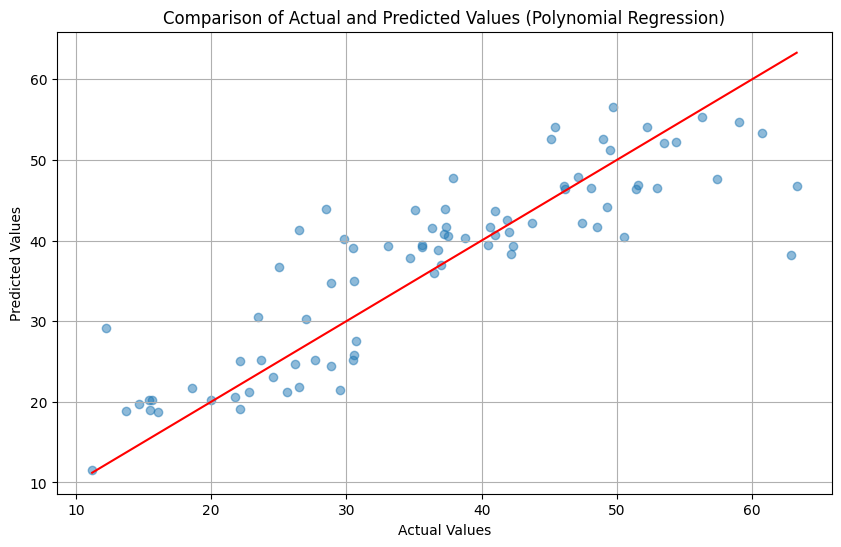

Polynomial Regression - Mean Squared Error: 41.85
Polynomial Regression - R^2 Score: 0.75


In [217]:
# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Polynomial Regression model
poly_reg = LinearRegression()

# Fit the model on the polynomial features
poly_reg.fit(X_train_poly, y_train)

# Predict on the polynomial testing data
y_pred_poly = poly_reg.predict(X_test_poly)

# Calculate and print the metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Plotting y_test vs y_pred_poly
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"Polynomial Regression - Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression - R^2 Score: {r2_poly:.2f}")


## Ridge Regression

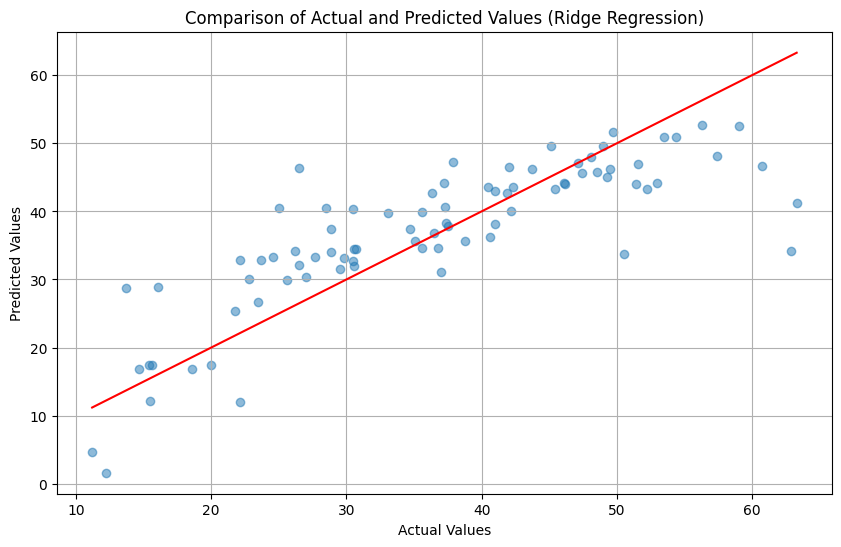

Ridge Regression - Mean Squared Error: 58.60
Ridge Regression - R^2 Score: 0.65


In [218]:
# Create a Ridge Regression model with an alpha value of 1.0
ridge_reg = Ridge(alpha=1.0)

# Fit the model on the polynomial features
ridge_reg.fit(X_train, y_train)

# Predict on the polynomial testing data
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate and print the metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plotting y_test vs y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression - R^2 Score: {r2_ridge:.2f}")


## Lasso Regression

## Elastic Net Regression

## XGBoost Regression 

# Assosiation Rules

In [219]:
# 0. Import Libraries


# 1. Data Loading


# 2. Preprocess Data


# 3. Apply TransactionEncoder


# 4. Generate Frequent Itemsets


# 5. Generate Association Rules


# 6. Display Rules

